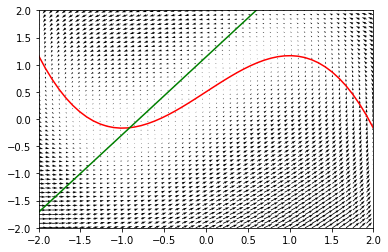

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__author__ = 'Dominik Krzeminski (dokato)'

tau   = 2
I_ext = 0.5
a     = 0.8
b     = 0.7

def model(x, t = 0):
    'FitzHugh–Nagumo model'
    V, W = x
    dV = V - V**3/3 - W + I_ext
    dW = (V + a - b * W) / tau
    return np.array([dV, dW])

def phase_plane_plot(model, range_x = (-1,1), range_y = None,
                     num_grid_points = 50, show = False):
    '''
    Simple implementation of the phase plane plot in matplotlib.
    
    Input:
    -----
      *model* : function
        function that takes numpy.array as input with two elements
        representing two state variables
      *range_x* = (-1, 1) : tuple
        range of x axis
      *range_y* = None : tuple
        range of y axis; if None, the same range as *range_x*
      *num_grid_points* = 50 : int
        number of samples on grid
      *show* = False : bool
        if True it shows matplotlib plot
    '''
    if range_y is None:
        range_y = range_x
    x_ = np.linspace(range_x[0], range_x[1], num_grid_points)                                                             
    y_ = np.linspace(range_y[0], range_y[1], num_grid_points)                                                             

    grid = np.meshgrid(x_, y_)

    dfmat = np.zeros((num_grid_points, num_grid_points, 2))
    for nx in range(num_grid_points):
        for ny in range(num_grid_points):
            df = model([grid[0][nx,ny], grid[1][nx,ny]])
            dfmat[nx, ny, 0] = df[0]
            dfmat[nx, ny, 1] = df[1]


    plt.quiver(grid[0], grid[1], dfmat[:, :, 0], dfmat[:, :, 1])
    plt.contour(grid[0], grid[1], dfmat[:, :, 0], [0], colors = 'r')
    plt.contour(grid[0], grid[1], dfmat[:, :, 1], [0], colors = 'g')
    if show:
        plt.show()

if __name__ == "__main__":
    phase_plane_plot(model, range_x = (-2, 2), show = True)